<a href="https://colab.research.google.com/github/Dan-Blanchette/Python_4ML/blob/main/Final_Project/k_means/k_means_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'K-means: k=5')

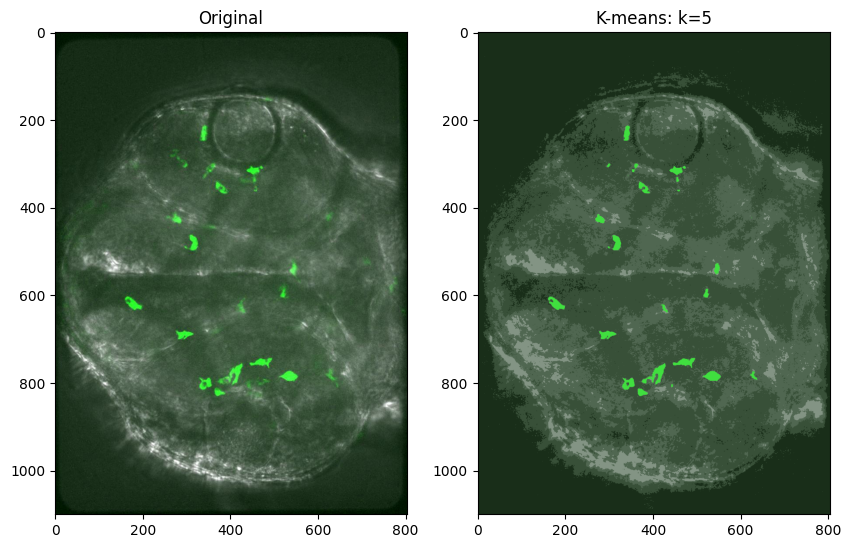

In [9]:
'''
@author Dan Blanchette
@date May 3, 2023
'''

import numpy as np
import matplotlib.pyplot as plt
import cv2

# create a figure 
fig = plt.figure(figsize=(10,7))

rows = 1
cols = 2

img = cv2.imread('1.png')

# reshape image to help implement k-means algorithm
img2 = img.reshape((-1,3))

# convert image to float32 to apply cv2 k-means
img2 = np.float32(img2)

# define number of cluster and apply k-means
# max iterations is 10 and epsilon = 1.0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Clusters
k = 5

attempts = 10

# returns compactness of cluster
# returns labels
# center of the cluster (centroid)
# Can use K-means PP_CENTERS OR RANDOM_CENTERS
ret, label, center = cv2.kmeans(img2, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

# center of each cluster
center = np.uint8(center)

res = center[label.flatten()]
# conver the dimensions back to image
res2 = res.reshape((img.shape))

cv2.imwrite('1segemented.png',res2)

seg = cv2.imread('1segemented.png')

fig.add_subplot(rows, cols, 1)

plt.imshow(img)
# plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, cols, 2)
plt.imshow(seg)
plt.title('K-means: k=5')
